# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [46]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

In [47]:
# # if you use Google Colab:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
# change this line your folder where the data is found
# basedir = "C:/Users/andre/Dropbox/MSc Data Science and Analytics/Computational Data Science/Coursework 2"
basedir = os.getcwd()

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [49]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
    return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [50]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20201212211823   2020-12-13   
1  20168  https://www.airbnb.com/rooms/20168  20201212211823   2020-12-13   
2  25428  https://www.airbnb.com/rooms/25428  20201212211823   2020-12-13   
3  27886  https://www.airbnb.com/rooms/27886  20201212211823   2020-12-13   
4  28871  https://www.airbnb.com/rooms/28871  20201212211823   2020-12-13   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2    Lovely apt in City Centre (w.lift) near Jordaan   
3  Romantic, stylish B&B houseboat in canal district   
4                            Comfortable double room   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   
2  Lovely apt in Centre ( lift & fireplace) near ...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   
2                                                NaN   
3         Central, quiet, safe, clean and beautiful.   
4       Flower market , Leidseplein , Rembrantsplein   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
2  https://a0.muscache.com/pictures/138431/7079a9...    56142   
3  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
4  https://a0.muscache.com/pictures/160889/362340...   124245   

                                   host_url  ... review_scores_communication  \
0    https://www.airbnb.com/users/show/3159  ...                        10.0   
1   https://www.airbnb.com/users/show/59484  ...                        10.0   
2   https://www.airbnb.com/users/show/56142  ...                        10.0   
3   https://www.airbnb.com/users/show/97647  ...                        10.0   
4  https://www.airbnb.com/users/show/124245  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                    9.0                10.0     NaN                t   
1                   10.0                 9.0     NaN                t   
2                   10.0                10.0     NaN                f   
3                   10.0                10.0     NaN                t   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              2                                           0   
2                              1                                           1   
3                              1                                           0   
4                              2                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            2   
2                                            0   
3                                            1   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.95  
1                                           0              2.58  
2                                           0              0.14  
3                                           0              2.01  
4                                           0              2.68  

[5 rows x 74 columns]

## Question 1a

In [51]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    '''
    Drops specified columns in the Question 1a description
    
    Args:
        df: The dataframe we want to modify.

    Returns: The dataframe without the columns we specified to drop.
    '''
    
    # Drop action for the specified columns
    df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about', 'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], inplace=True, axis=1)
    return df

In [52]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [53]:
print(df.isna().sum())

id                                  0
name                               33
host_id                             0
host_name                          55
host_since                         55
host_response_time              14273
host_response_rate              14273
host_acceptance_rate             9255
host_is_superhost                  55
host_neighbourhood               6203
host_listings_count                55
host_has_profile_pic               55
host_identity_verified             55
neighbourhood_cleansed              0
neighbourhood_group_cleansed    18522
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                       18522
bedrooms                         1014
beds                              107
price                               0
minimum_nights                      0
maximum_nights                      0
calendar_upd

In [54]:
def drop_cols_na(df, threshold = 0.5):
    '''
    Drops columns according to the amount of NaN values they contain.
    
    Args:
        df: The dataframe we want to modify.
        threshold: Threshold is the limit of which if a column has equal or higher proportion of NaNs the column is dropped.

    Returns: The dataframe without the columns dropped for having higher proportion of NaNs than the threshold.
    '''
    
    # Number of rows of the dataset
    rows = len(df)

    # Sum of NaNs per column
    column_na = list(zip(df.columns, df.isna().sum()))

    for column in column_na:

        # column[1] / rows is the proportion of NaNs for the column
        if column[1] / rows > threshold:
            df.drop(column[0], inplace=True, axis=1)

    return df

In [55]:
df = drop_cols_na(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

## Question 1b

In [58]:
def binary_encoding(df):
    '''
    For columns that have as values the strings ‘t’ (for True) and ‘f’ (for False) we recode these columns by turning them into the integer numbers 0 and 1.
    
    Args:
        df: The dataframe we want to modify.

    Returns: The dataframe with columns that had as values the strings ‘t’ (for True) and ‘f’ (for False) changed into the integer numbers 0 and 1.
    '''
    
    for column in df.columns:
        values = dict(df[column].value_counts())

        # If a column has as values the strings ‘t’ (for True) and ‘f’ (for False) this condition will be true
        if list(values.keys()) == ['f','t']:
            temp = []
            for x in df[column]:
                if x == 't':
                    temp.append(1)
                elif x == 'f':
                    temp.append(0)
                else:
                    # This is for the NaNs
                    temp.append(x)
            df[column] = temp
    return df

In [59]:
df = binary_encoding(df)

In [60]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [17]:
# hint: check Pandas to_datetime method
def add_host_days(df):
    '''
    We insert a column that represents the number of days (with respect to the current date) that the host has been registered, called 'host_days'.
    
    Args:
        df: The dataframe we want to modify.

    Returns: The dataframe with the new column 'host_days'.
    '''
    
    # Initialize empty array to append the values of the new column 'host_days'
    host_days = []
    for day in df['host_since']:
        # With this try-except we catch the Error of having NaN as the value of 'host_since' column for a host. If we have NaN we will add None to the array host_days
        try:
            host_days.append(int((pd.to_datetime('today').normalize() - pd.to_datetime(day)).days))
        except:
            host_days.append(None)

    df['host_days'] = host_days
    return df

In [18]:
def convert_price(df):
    '''
    Convert the values of column 'price' from string of format string '$XX' to float XX.0.
    
    Args:
        df: The dataframe we want to modify.

    Returns: The dataframe with the modified column 'price'.
    '''
    
    prices = []
    for price in df['price']:
        # By getting price[1:] we are removing the $ from the string
        prices.append(float(price[1:].replace(',','')))

    df['price'] = prices
    return df

In [19]:
df = add_host_days(df)
df = convert_price(df)

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [20]:
# How many hosts offer 2 or more properties for rent?
sum(i > 1 for i in list(df['host_id'].value_counts()))

1331

In [21]:
# What is the highest price for a listing?
df['price'].max()

8000.0

In [22]:
# What is the ID of the listing that has the largest number of bedrooms?
df[df['bedrooms'] == df['bedrooms'].max()].iloc[0]['id']

46015289

In [23]:
# What is the ID of the listing with the largest advertised price
df[df['price'] == df['price'].max()].iloc[0]['id']

258273

In [24]:
# There are different room types. How many listings are there for the most common room type?
df['room_type'].value_counts().max()

14433

In [25]:
# How many hosts are there that have been registered for more than 3000 days?
len(pd.unique(df['host_id'][df['host_days'] > 3000]))

2296

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

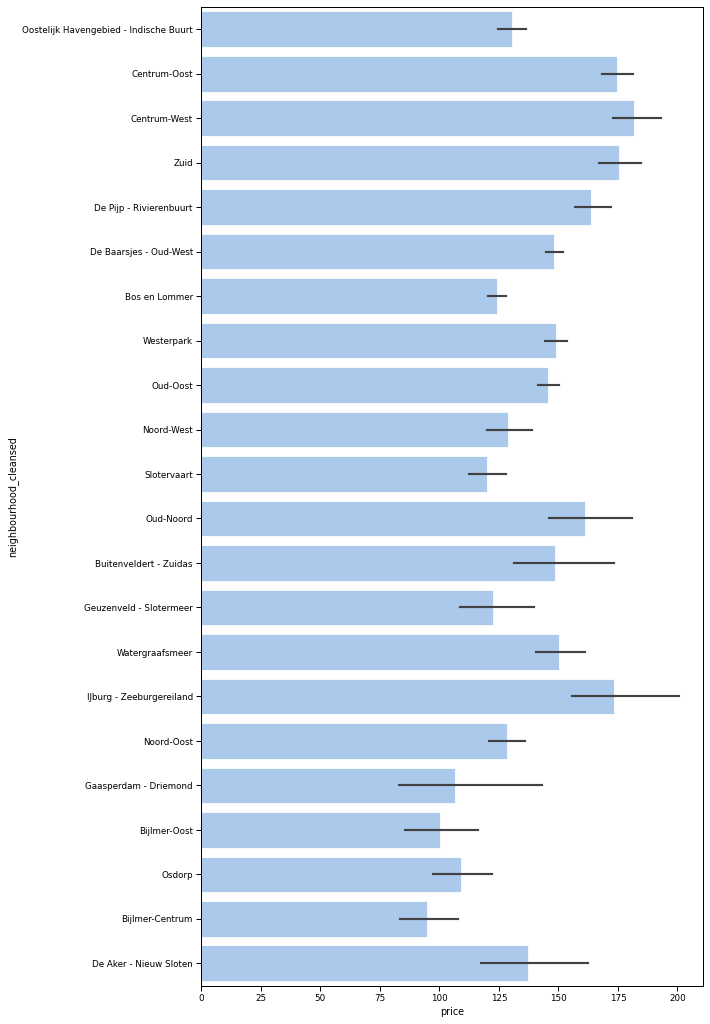

In [26]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (9,18))
sns.set_color_codes('pastel')
sns.barplot(x = 'price', y = 'neighbourhood_cleansed', data = df,
            label = 'neighbourhood_cleansed', color = 'b', edgecolor = 'w')
plt.show()

Plot a correlation matrix as instructed in the Coursework proforma:

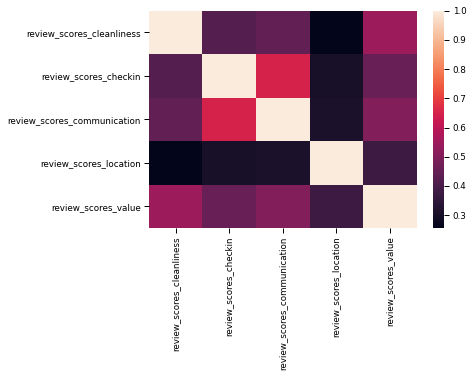

In [27]:
ax = sns.heatmap(df[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr())

Plot a geographical distribution as instructed in the Coursework proforma:

In [28]:
# To group the values we assign one value per group of value inside the ranges we want to display in the scatterplot

mydata = df[df.price>150]

mydata.price[mydata.price>6000] = 7500

mydata.price[(mydata.price>4500) & (mydata.price<=6000)] = 6000

mydata.price[(mydata.price>3000) & (mydata.price<=4500)] = 4500

mydata.price[(mydata.price>1500) & (mydata.price<=3000)] = 3000

mydata.price[mydata.price<=1500] = 1500

# from IPython.display import clear_output
# clear_output()

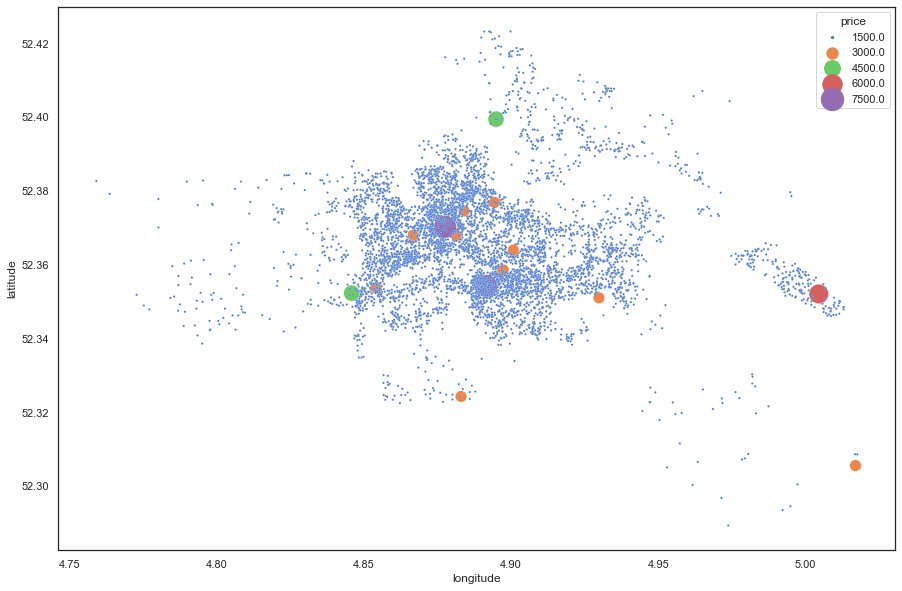

In [29]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize = (15,10))

yo = sns.scatterplot(data=mydata, x="longitude", y="latitude", hue="price", size="price",
    sizes=(5, 500), hue_norm=(0, 100), alpha=1, palette="muted", legend = "full")

plt.show()

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [30]:
# Performing a linear regression on rating using statsmodels.
fit = sm.OLS.from_formula('review_scores_rating ~ review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value', df).fit()

In [32]:
# With xname we are making sure that the variable names shown in the summary are short and readable
print(fit.summary(xname=['Intercept','accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value']))

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                          13:37:13   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169  

In [33]:
# Creating a list with the names of room_types existing in our dataframe
room_types = [room for room in dict(df.room_type.value_counts()).keys()]

In [34]:
def multiple_t_tests(alpha = 0.01, create_df = False, room_types = room_types):
    '''
    Convert the values of column 'price' from string of format string '$XX' to float XX.0.
    
    Args:
        alpha: The dataframe we want to modify.
        create_df: The dataframe we want to modify.
        room_types: The dataframe we want to modify.

    Returns: The dataframe with the modified column 'price'.
    '''
    
    alpha = 0.01
    if create_df : p_value_list = []
    for type1 in room_types:
        if create_df : p_value = []
        for type2 in room_types:
            if type1 != type2:
                print(f'\n{type1} --- {type2}\n\n')
                df_room_type_1 = df[df.room_type == type1]
                df_room_type_2 = df[df.room_type == type2]
                res = scipy.stats.ttest_ind(df_room_type_1.price, df_room_type_2.price)
                if res.pvalue < alpha:
                    if create_df : p_value.append(res.pvalue)
                    print(f'P-value: {res.pvalue:.19f} < {alpha}')
                    print(f'T-statistic: {res.statistic:.3f}')
                    print(f'\'{type1}\' room type has greater prices than \'{type2}\' room type (at a significance level of alpha={alpha}).')
                else:
                    if create_df : p_value.append(res.pvalue)
                    print(f'P-value: {res.pvalue:.19f} > {alpha}')
                    print(f'T-statistic: {res.statistic:.3f}')
                    print(f'\'{type1}\' room type does not have greater prices than \'{type2}\' room type (at a significance level of alpha={alpha}).')
            else:
                if create_df : p_value.append(None)
        if create_df : p_value_list.append(tuple(p_value))
        
    return p_value_list

In [35]:
multiple_t_tests(0.01, True)


Entire home/apt --- Private room


P-value: 0.0000000000000000000 < 0.01
T-statistic: 29.275
'Entire home/apt' room type has greater prices than 'Private room' room type (at a significance level of alpha=0.01).

Entire home/apt --- Hotel room


P-value: 0.0029292208875053489 < 0.01
T-statistic: 2.976
'Entire home/apt' room type has greater prices than 'Hotel room' room type (at a significance level of alpha=0.01).

Entire home/apt --- Shared room


P-value: 0.0021768318613784249 < 0.01
T-statistic: 3.066
'Entire home/apt' room type has greater prices than 'Shared room' room type (at a significance level of alpha=0.01).

Private room --- Entire home/apt


P-value: 0.0000000000000000000 < 0.01
T-statistic: -29.275
'Private room' room type has greater prices than 'Entire home/apt' room type (at a significance level of alpha=0.01).

Private room --- Hotel room


P-value: 0.0000596655232293761 < 0.01
T-statistic: -4.018
'Private room' room type has greater prices than 'Hotel room' room typ

[(None, 3.624982158693227e-184, 0.002929220887505349, 0.002176831861378425),
 (3.624982158693227e-184, None, 5.966552322937605e-05, 0.45169288789644646),
 (0.002929220887505349, 5.966552322937605e-05, None, 0.3121192503013984),
 (0.002176831861378425, 0.45169288789644646, 0.3121192503013984, None)]

In [36]:
p_value_list = multiple_t_tests(0.01/12,True,room_types)


Entire home/apt --- Private room


P-value: 0.0000000000000000000 < 0.01
T-statistic: 29.275
'Entire home/apt' room type has greater prices than 'Private room' room type (at a significance level of alpha=0.01).

Entire home/apt --- Hotel room


P-value: 0.0029292208875053489 < 0.01
T-statistic: 2.976
'Entire home/apt' room type has greater prices than 'Hotel room' room type (at a significance level of alpha=0.01).

Entire home/apt --- Shared room


P-value: 0.0021768318613784249 < 0.01
T-statistic: 3.066
'Entire home/apt' room type has greater prices than 'Shared room' room type (at a significance level of alpha=0.01).

Private room --- Entire home/apt


P-value: 0.0000000000000000000 < 0.01
T-statistic: -29.275
'Private room' room type has greater prices than 'Entire home/apt' room type (at a significance level of alpha=0.01).

Private room --- Hotel room


P-value: 0.0000596655232293761 < 0.01
T-statistic: -4.018
'Private room' room type has greater prices than 'Hotel room' room typ

In [37]:
df_p_value = pd.DataFrame(p_value_list, columns = room_types, index=room_types)
df_p_value

Entire home/apt   Private room  Hotel room  Shared room
Entire home/apt              NaN  3.624982e-184    0.002929     0.002177
Private room       3.624982e-184            NaN    0.000060     0.451693
Hotel room          2.929221e-03   5.966552e-05         NaN     0.312119
Shared room         2.176832e-03   4.516929e-01    0.312119          NaN

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[double click to edit]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

In [38]:
pd.get_dummies(df['room_type'])

Entire home/apt  Hotel room  Private room  Shared room
0                    0           0             1            0
1                    0           0             1            0
2                    1           0             0            0
3                    0           0             1            0
4                    0           0             1            0
...                ...         ...           ...          ...
18517                1           0             0            0
18518                1           0             0            0
18519                1           0             0            0
18520                0           0             1            0
18521                0           0             1            0

[18522 rows x 4 columns]

In [39]:
def variable_selection(df = df, predictors = ['host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'], target = 'price', alpha = 0.05):
    '''
    Convert the values of column 'price' from string of format string '$XX' to float XX.0.
    
    Args:
        alpha: The dataframe we want to modify.
        create_df: The dataframe we want to modify.
        room_types: The dataframe we want to modify.

    Returns: The dataframe with the modified column 'price'.
    '''
    
    pred = [predictors[0]]
    formula = f'{target} ~ room_type'
    print(formula)
    fit = sm.OLS.from_formula(formula, df).fit()
    r2 = fit.rsquared
    print(r2)
    for x in predictors:
        formula += f' + {x}'
        print(formula)
        fit = sm.OLS.from_formula(formula, df).fit()
        print(fit.rsquared)
        if r2 > fit.rsquared: 
            formula = formula.replace(f' + {x}','')
        else:
            pred.append(x)
            r2 = fit.rsquared
        print(r2)
    
    low_p_values = bool(1)

    while low_p_values:
        fit = sm.OLS.from_formula(formula, df).fit()
        print(fit.summary())
        print(f'\n{[x for x in dict(fit.pvalues).values()]}\n')
        p_values_dict = dict(fit.pvalues)
        p_values_dict.pop('Intercept', None)
        count = 0
        max_p_value = 0
        max_p_value_name = ''
        for k, v in p_values_dict.items():
            if v > alpha and 'room_type' != k[:9]: 
                if v > max_p_value: 
                    max_p_value = v
                    max_p_value_name = k
#                 formula = formula.replace(f'{k} + ','')
#                 print(f'Remove {k}')
#                 break
            else:
                count += 1
#         print('room_type' != max_p_value_name[:9])
#         print(max_p_value_name[:9])
        if max_p_value != 0:
            formula = formula.replace(f'{max_p_value_name} + ','')
            print(f'Remove {max_p_value_name}')
        if count == len(p_values_dict) : low_p_values = bool(0)
    return pred

In [40]:
predictors = variable_selection(df,['host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 
    #    'review_scores_rating', 'review_scores_accuracy',
    #    'review_scores_cleanliness', 'review_scores_checkin',
    #    'review_scores_communication', 'review_scores_location',
    #    'review_scores_value', 'reviews_per_month'
       ],'price',0.05)

tude + accommodates + bedrooms
0.1317348187440801
0.1317348187440801
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + beds
0.1313899050021875
0.1317348187440801
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + minimum_nights
0.13392065833281053
0.13392065833281053
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + minimum_nights + maximum_nights
0.1340201856095653
0.1340201856095653
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + minimum_nights + maximum_nights + availability_30
0.14164835925991748
0.14164835925991748
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + minimum_nights + maximum_nights + availability_30 + availability_60
0.14176410735707867
0.14176410735707867
price ~ room_type + host_listings_count + latitude + longitude + accommodates + bedrooms + minimum_nights + ma

In [41]:
predictors

['host_listings_count',
 'host_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm']

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [42]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    '''
    This function recommends a neighbourhood to guests who are traveling on a specific budget bracket.
    
    Args:
        df: The dataframe we want to search on.
        budget_min: The minimum value for budget.
        budget_max: The maximum value for budget.
        relative: Boolean value, if True then the suggestion for the neighbourhood will be based on relative values. Otherwise the suggestion will be based on absolute values.

    Returns: The name of the neighbourhood suggested.
    '''
        
    # Subset of original dataframe with prices in the range specified by budget_min and budget_max
    results_in_range = df[(df['price'] >= budget_min) & (df['price'] <= budget_max)]

    # Values of opportunities for each neighbourhood in the new subset
    results_in_range_dict = results_in_range['neighbourhood_cleansed'].value_counts()

    # Initializing values for neighbourhood variable that we will return at the end as suggestion for the guest
    neighbourhood = ''
    # Initializing max_value to 0 as it can not be lower or equal to 0
    max_value = 0

    # Values for opportunities for each neighbourhood in the original dataframe to be used if the comparison between neighbourhoods will be based on relative values
    df_dict = df['neighbourhood_cleansed'].value_counts()

    for k, v  in results_in_range_dict.items():
        if relative:
            response = myfunction(k, v / df_dict[k], neighbourhood, max_value)
        else:
            response = myfunction(k, v, neighbourhood, max_value)

        neighbourhood = response[0]
        max_value = response[1]

    return neighbourhood

def myfunction(k, v, neighbourhood, max_value):
    '''
    Compares v to max_value to check whether the new neighbourhood ( k ) has higher max_value than the previous ( neighbourhood ).

    Args:
        k: The neighbourhood we want to compare with the ongoing neighbourhood with most opportunities.
        v: The value of opportunities for the neighbourhood we want to compare with the ongoing neighbourhood with most opportunities.
        neighbourhood: The ongoing neighbourhood with most opportunities.
        max_value: The ongoing value of opportunities for the neighbourhood with most opportunities.

    Returns: Array with 2 values, the max_value either the same or new if v was higher and the neighbourhood based on the aforementioned condition.
    '''
    
    if v > max_value:
        neighbourhood = k
        max_value = v

    return [neighbourhood, max_value]


### Price recommender for hosts

In [43]:
def distance(df, latitude, longitude):
    '''
    This function recommends a neighbourhood to guests who are traveling on a specific budget bracket.
    
    Args:
        df: The dataframe we want to search on.
        latitude: The latitude representing latitude of the property the user wants to take into account.
        longitude: The longitude representing latitude of the property the user wants to take into account.

    Returns: The name of the neighbourhood suggested.
    '''

    df['distance'] = [(latitude - row['latitude']) ** 2 + (longitude - row['longitude']) ** 2  for index, row in df.iterrows()]
    
    return df.sort_values(by=['distance'])

In [44]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type = None):
    '''
    This function recommends a price for a room / flat / house a host want to offer on Airbnb.
    
    Args:
        df: The dataframe we want to search on.
        latitude: The latitude representing latitude of the property the user wants to take into account.
        longitude: The longitude representing latitude of the property the user wants to take into account.
        n_neighbours: The number of neighbouring properties the user wants to take into account.
        room_type: If specified, restricts the neighbours search to properties of the given room type.

    Returns: The price recommendation for the property based on the mean price of neighbourhing properties.
    '''

    if room_type == None:
        new_df = distance(df, latitude, longitude)
    else:
        new_df = distance(df[df['room_type'] == room_type], latitude, longitude)

    print(new_df.price[:n_neighbours])
    print(new_df.distance[:n_neighbours])
    price_recommendation = new_df.price[:n_neighbours].mean()
    return price_recommendation

In [45]:
recommend_price(df, 52, 5, 5)

2437     170.0
10606     80.0
12585    110.0
2432      30.0
15462    115.0
Name: price, dtype: float64
2437     0.084366
10606    0.084564
12585    0.084750
2432     0.084764
15462    0.084988
Name: distance, dtype: float64


101.0